In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean as ccm

import matplotlib.style as style
style.use('tableau-colorblind10')

In [2]:

CB_colors = {
	'blue':	'#377eb8',
	'orange':  '#ff7f00',
	'green':   '#4daf4a',
	'pink':	'#f781bf',
	'brown':   '#a65628',
	'purple':  '#984ea3',
	'gray':	'#999999',
	'red': 	'#e41a1c',
	'yellow':  '#dede00'
}


In [3]:
from dask.distributed import Client
c = Client()
# c = Client(n_workers=6, threads_per_worker=1, memory_limit="8 GiB",local_directory="/gpfsscratch/rech/cli/uor98hu/dask_tmp/")
c

/linkhome/rech/genlop01/uor98hu/.local/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41501 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41501/status,
Dashboard: http://127.0.0.1:41501/status,Workers: 5
Total threads: 10,Total memory: 20.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39517,Workers: 5
Dashboard: http://127.0.0.1:41501/status,Total threads: 10
Started: Just now,Total memory: 20.00 GiB
Comm: tcp://127.0.0.1:43997,Total threads: 2
Dashboard: http://127.0.0.1:46693/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:39777,


# Save data in work

In [4]:
chunk_size = {"x":349,"y":500} 

dirisc= "/gpfsscratch/rech/cli/uor98hu/Calcul_psi/"
GAI_psi  = xr.open_mfdataset(dirisc+"GAI/"+"*.nc" ,chunks=chunk_size, parallel = True).sobarstf
AI_psi  = xr.open_mfdataset(dirisc+"AI/"+"*.nc" ,chunks=chunk_size, parallel = True).sobarstf
S_psi  = xr.open_mfdataset(dirisc+"S/"+"*.nc" ,chunks=chunk_size, parallel = True).sobarstf

diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"

In [5]:
# convert to annual data
psi_GAI = GAI_psi.groupby('time_counter.year').mean('time_counter').chunk(chunks={"x":500,"y":500, "year":20})
psi_AI  = AI_psi.groupby('time_counter.year').mean('time_counter').chunk(chunks={"x":500,"y":500, "year":20})
psi_S   = S_psi.groupby('time_counter.year').mean('time_counter').chunk(chunks={"x":500,"y":500, "year":20})

In [6]:
# years to read data from: 
y1='2005'
y2='2018'

DIFF_GAI_S  = (psi_GAI - psi_S ).sel(year=slice(y1,y2))/1e6 
DIFF_GAI_AI = (psi_GAI - psi_AI).sel(year=slice(y1,y2))/1e6 
DIFF_AI_S   = (psi_AI  - psi_S ).sel(year=slice(y1,y2))/1e6 

# calculate the trend on yearly data in mm/yr
trcoeffGAI_S  =  DIFF_GAI_S.polyfit(dim='year',deg=1).polyfit_coefficients
trcoeffGAI_AI =  DIFF_GAI_AI.polyfit(dim='year',deg=1).polyfit_coefficients
trcoeffAI_S   =  DIFF_AI_S.polyfit(dim='year',deg=1).polyfit_coefficients

In [14]:
# trGAI_S = trcoeffGAI_S.isel(degree=0).compute()
# dsGAI_S = xr.Dataset(
#     data_vars=dict(trend=(["y", "x"], trGAI_S.data)),
#     attrs=dict(
#         description="trend over the period 2005-2018 from annual psi",
#         units="mm/yr"))

# dsGAI_S.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y2005_2018.1y_trendGAI_Spsi.nc', mode='w')

<xarray.DataArray 'polyfit_coefficients' (y: 1207, x: 1442)>
dask.array<getitem, shape=(1207, 1442), dtype=float64, chunksize=(168, 1442), chunktype=numpy.ndarray>
Coordinates:
    degree   int64 1
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 1200 1201 1202 1203 1204 1205 1206
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 1435 1436 1437 1438 1439 1440 1441

In [7]:
trGAI_AI = trcoeffGAI_AI.isel(degree=0).compute()
dsGAI_AI = xr.Dataset(
    data_vars=dict(trend=(["y", "x"], trGAI_AI.data)),
    attrs=dict(
        description="trend over the period 2005-2018 from annual psi",
        units="mm/yr"))

dsGAI_AI.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y2005_2018.1y_trendGAI_AIpsi.nc', mode='w')

In [8]:
trAI_S = trcoeffAI_S.isel(degree=0).compute()
dsAI_S = xr.Dataset(
    data_vars=dict(trend=(["y", "x"], trAI_S.data)),
    attrs=dict(
        description="trend over the period 2005-2018 from annual psi",
        units="mm/yr"))

dsAI_S.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y2005_2018.1y_trendAI_Spsi.nc', mode='w')

In [9]:
# years to read data from: 
y1='2005'
y2='2018'

GAIshort  = (psi_GAI).sel(year=slice(y1,y2))/1e6 
AIshort   = (psi_AI).sel(year=slice(y1,y2))/1e6 
Sshort    = (psi_S ).sel(year=slice(y1,y2))/1e6 

# calculate the trend on yearly data in mm/yr
trcoeffGAI  =  GAIshort.polyfit(dim='year',deg=1).polyfit_coefficients
trcoeffAI   =  AIshort.polyfit(dim='year',deg=1).polyfit_coefficients
trcoeffS    =  Sshort.polyfit(dim='year',deg=1).polyfit_coefficients

In [11]:
trGAI = trcoeffGAI.isel(degree=0).compute()
dsGAI = xr.Dataset(
    data_vars=dict(trend=(["y", "x"], trGAI.data)),
    attrs=dict(
        description="trend over the period 2005-2018 from annual psi",
        units="mm/yr"))

dsGAI.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y2005_2018.1y_trendGAIpsi.nc', mode='w')

In [12]:
trAI = trcoeffAI.isel(degree=0).compute()
dsAI = xr.Dataset(
    data_vars=dict(trend=(["y", "x"], trAI.data)),
    attrs=dict(
        description="trend over the period 2005-2018 from annual psi",
        units="mm/yr"))

dsAI.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y2005_2018.1y_trendAIpsi.nc', mode='w')

In [13]:
trS = trcoeffS.isel(degree=0).compute()
dsS = xr.Dataset(
    data_vars=dict(trend=(["y", "x"], trS.data)),
    attrs=dict(
        description="trend over the period 2005-2018 from annual psi",
        units="mm/yr"))

dsS.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y2005_2018.1y_trendSpsi.nc', mode='w')

# Loading data

In [42]:
chunk_size = {"x":349,"y":500} 

diriww= "/gpfswork/rech/cli/uor98hu/MYDATA/psi/"
GAI_psi  = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y2005_2018.1y_trendGAIpsi.nc" ,chunks=chunk_size).trend
AI_psi   = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y2005_2018.1y_trendAIpsi.nc" ,chunks=chunk_size).trend
S_psi    = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y2005_2018.1y_trendSpsi.nc" ,chunks=chunk_size ).trend

GAI_S_psi  = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y2005_2018.1y_trendGAI_Spsi.nc" ,chunks=chunk_size).trend
GAI_AI_psi = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y2005_2018.1y_trendGAI_AIpsi.nc" ,chunks=chunk_size).trend
AI_S_psi   = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y2005_2018.1y_trendAI_Spsi.nc" ,chunks=chunk_size ).trend

# figure

In [43]:
# read grid files
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
tmask = xr.open_dataset(diri+'mesh_hgr.nc', chunks={"x":500,"y":500})['tmask'][0,0,:,:] # grille lat/lon
nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']
mbathy = xr.open_dataset(diri+'eORCA025.L75_domain_cfg_closed_seas_greenland.nc')['bathy_meter'].isel(t=0) # grille lat/lon

BGRmask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/TRANSPORT_WP1/BGRmaskobs.nc').BGRmask.squeeze()
# land mask from model
m2plt      = tmask.where(tmask==0)
# default gridlines parameters
gridl=False
incrgridlon=30
incrgridlat=10

#vue polaire
loncentr=200 # before it was zero
latcentr=90

sath=2085831

In [39]:
#========= Plot settings ===============
# colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [44]:
cmap = ccm.cm.balance
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

lmin = -0.45
incr = 0.05
lmax = lmin*(-1)+0.05
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [48]:
cmap = ccm.cm.balance
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

lmin = -1.0
incr = 0.1
lmax = lmin*(-1)+0.1
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

psi_trendGAIS_2005-2018.png


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


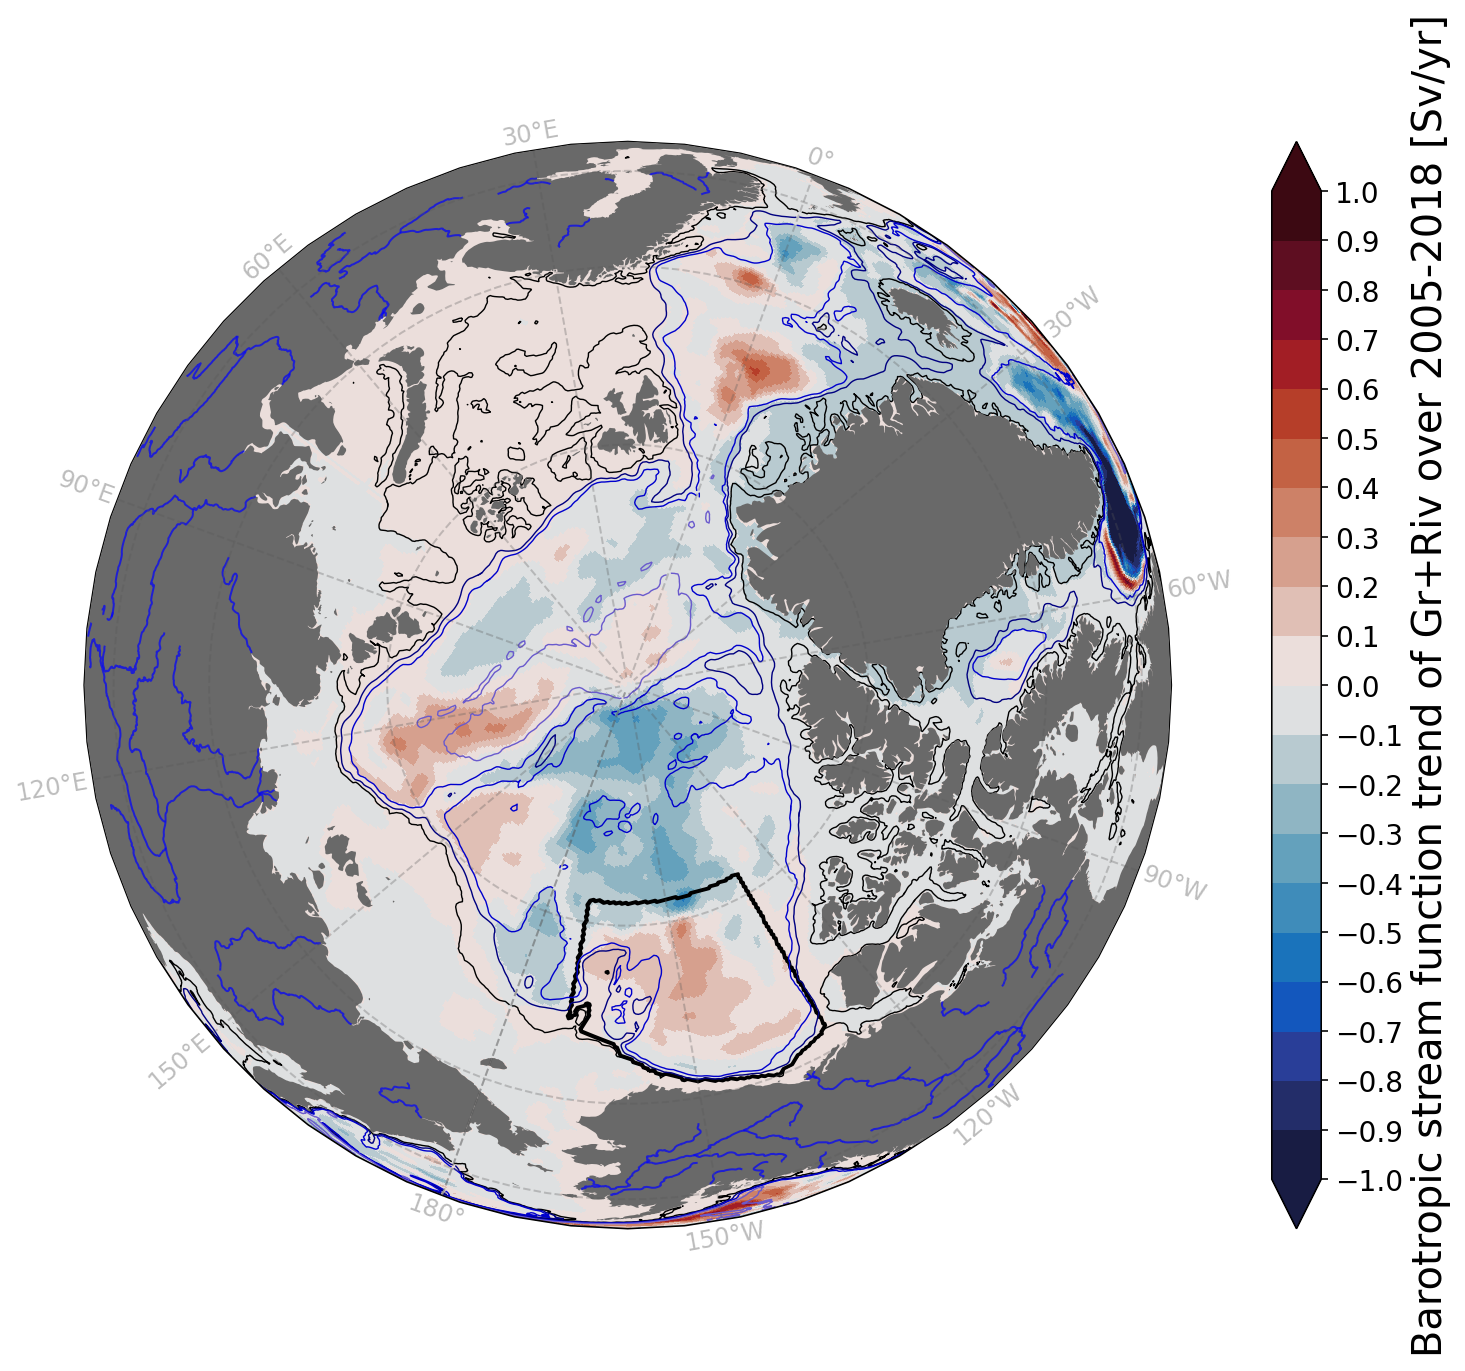

In [49]:
# plot directory
diro = "/gpfsscratch/rech/cli/uor98hu/SL_components/PLOTS/"

#========= CREATE FIGURE
## GAI -AI
# data2plot = dataTrGAI_AI.where(tmask!=0,0).squeeze()
# tlabel = decomposition+" SSH trend of GREENLAND (mm/yr) over "+y1+"-"+y2
# namo  = decomposition+"SSH_trendGAIAI_"+y1+"-"+y2+".png"
# cbalabel = r'GREENLAND '+decomposition+' trends over '+y1+'-'+y2+' [mm/yr]'

# AI - S
# data2plot = dataTrAI_S.where(tmask!=0,0).squeeze()
# tlabel = decomposition+" SSH trend of RIVERS (mm/yr) over "+y1+"-"+y2
# namo  = decomposition +"SSH_trendAIS_"+y1+"-"+y2+".png"
# cbalabel = r'RIVERS '+decomposition+' trends over '+y1+'-'+y2+' [mm/yr]'

# ## GAI - S
data2plot = GAI_psi.where(tmask!=0,0)#.squeeze()

tlabel = " Barotropic stream function trend of Gr+Riv (Sv/yr) over "+y1+"-"+y2
namo  =  "psi_trendGAIS_"+y1+"-"+y2+".png"
cbalabel = r'Barotropic stream function trend of Gr+Riv over '+y1+'-'+y2+' [Sv/yr]'

print(namo)
#===========================================
fig = plt.figure(figsize=([18,10]),facecolor='none', dpi=72*2)

trdata  = ccrs.PlateCarree() # Data system proj (if coords are in lat lon, use PlateCarre here)
ax = plt.axes(projection= ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath))

#========= PLOT DATA

ax.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = plt.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata, norm=norm)
cbar = fig.colorbar(cs,extend='both', ticks=bounds)
cbar.ax.tick_params(labelsize=14)

cbar.set_label(cbalabel, fontsize=20)

# cs2  = plt.pcolormesh(nav_lon, nav_lat, m2plt, shading='flat',transform=trdata) 
#========= coastlines and gridlines
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
clr2 = ax.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2 = ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl =ax.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
label_style = {'size': 12, 'color': '#BDBDBD', 'weight': 'normal'}
gl.xlabel_style = label_style; gl.ylabel_style = label_style


#============= BATHYMETRY
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']
# west
Ct1 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
# east
Ct2 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

# plt.title(tlabel,fontsize=24)
plt.show()
# fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
plt.close(fig)
# plt.clf()